In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stat
import math
import warnings
warnings.filterwarnings('ignore')

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.metrics import *

In [14]:
df =pd.read_csv('insurance.csv')

In [15]:
df.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,southeast,1137.0110


In [16]:
df.tail()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
1333,33.0,female,35.530,0.0,yes,63142.25346,32.0,1091267.0,170380500.5,2.0,3.101107e+09,northwest,55135.40209
1334,31.0,female,38.095,1.0,yes,43419.95227,31.0,1107872.0,201515184.8,2.0,3.484216e+09,northeast,58571.07448
1335,52.0,male,34.485,3.0,yes,52458.92353,25.0,1092005.0,223644981.3,2.0,3.640807e+09,northwest,60021.39897
1336,45.0,male,30.360,0.0,yes,69927.51664,34.0,1106821.0,252892382.6,3.0,4.006359e+09,southeast,62592.87309
1337,54.0,female,47.410,0.0,yes,63982.80926,31.0,1100328.0,261631699.3,3.0,4.117197e+09,southeast,63770.42801


In [17]:
df.shape

(1338, 13)

In [18]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'Claim_Amount',
       'past_consultations', 'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary', 'region', 'charges'],
      dtype='object')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [20]:
df.isnull().sum()

age                                 9
sex                                 0
bmi                                 3
children                            5
smoker                              0
Claim_Amount                       14
past_consultations                  6
num_of_steps                        3
Hospital_expenditure                4
NUmber_of_past_hospitalizations     2
Anual_Salary                        6
region                              0
charges                             0
dtype: int64

In [21]:
df.isnull().mean() * 100

age                                0.672646
sex                                0.000000
bmi                                0.224215
children                           0.373692
smoker                             0.000000
Claim_Amount                       1.046338
past_consultations                 0.448430
num_of_steps                       0.224215
Hospital_expenditure               0.298954
NUmber_of_past_hospitalizations    0.149477
Anual_Salary                       0.448430
region                             0.000000
charges                            0.000000
dtype: float64

In [23]:
df.select_dtypes(include='number').corr()

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,charges
age,1.000000,0.112849,0.041558,0.123430,0.169275,0.517930,0.136930,0.363041,0.164328,0.294390
bmi,0.112849,1.000000,0.007944,0.093893,0.131246,0.136368,0.257141,0.137575,0.241941,0.198794
children,0.041558,0.007944,1.000000,0.041778,0.054787,0.163522,0.025150,0.185607,0.040070,0.070747
Claim_Amount,0.123430,0.093893,0.041778,1.000000,0.273779,0.400672,0.374159,0.381152,0.409268,0.439161
past_consultations,0.169275,0.131246,0.054787,0.273779,1.000000,0.562344,0.544640,0.503798,0.596322,0.629836
num_of_steps,0.517930,0.136368,0.163522,0.400672,0.562344,1.000000,0.626659,0.850089,0.739426,0.890642
Hospital_expenditure,0.136930,0.257141,0.025150,0.374159,0.544640,0.626659,1.000000,0.657247,0.969695,0.874079
NUmber_of_past_hospitalizations,0.363041,0.137575,0.185607,0.381152,0.503798,0.850089,0.657247,1.000000,0.743466,0.823581
Anual_Salary,0.164328,0.241941,0.040070,0.409268,0.596322,0.739426,0.969695,0.743466,1.000000,0.954255
charges,0.294390,0.198794,0.070747,0.439161,0.629836,0.890642,0.874079,0.823581,0.954255,1.000000


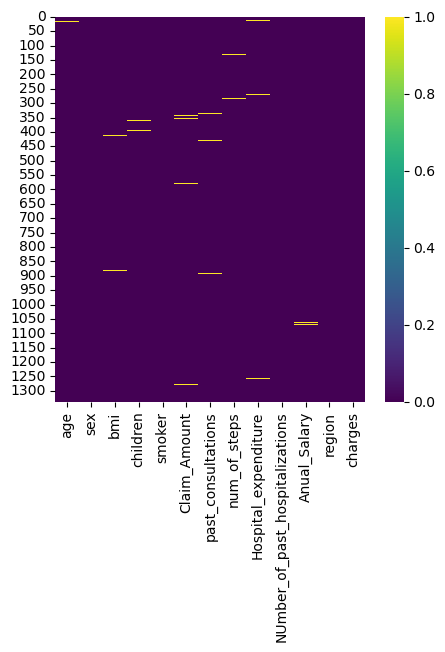

In [25]:
#visualizing null values
plt.figure(figsize = (5,5))
sns.heatmap(df.isnull(), cmap= 'viridis');

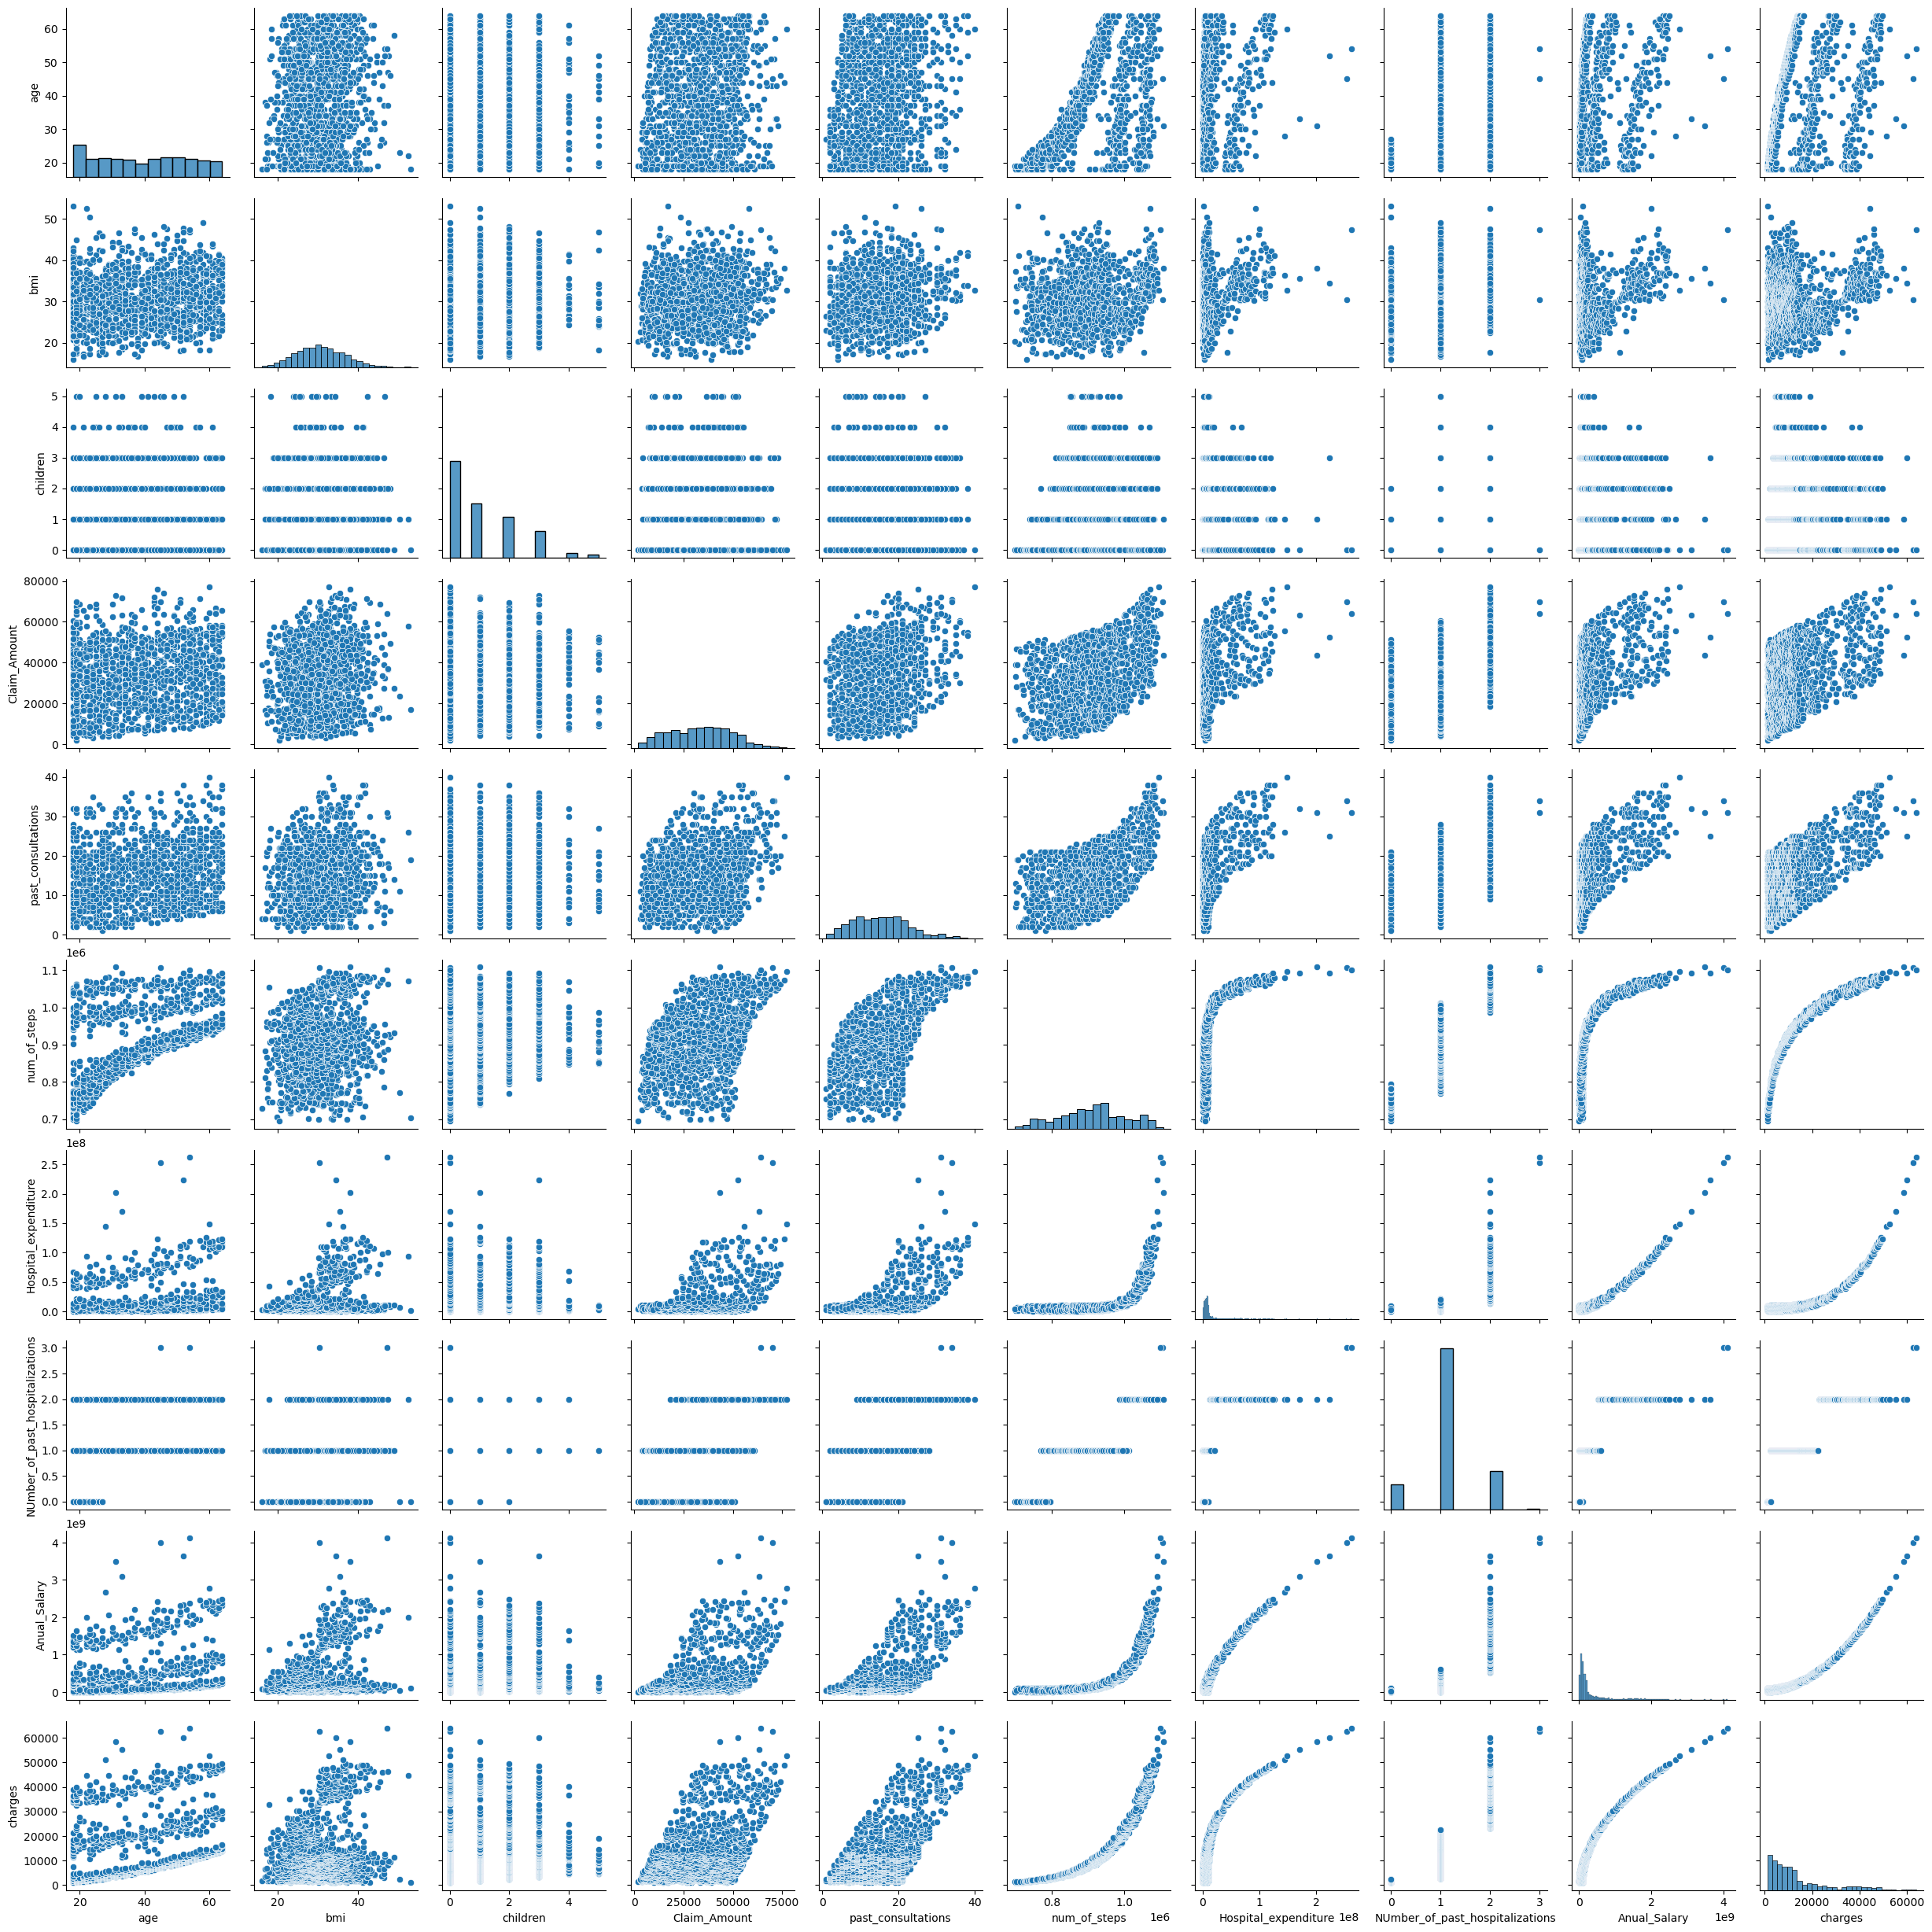

In [29]:
sns.pairplot(df);

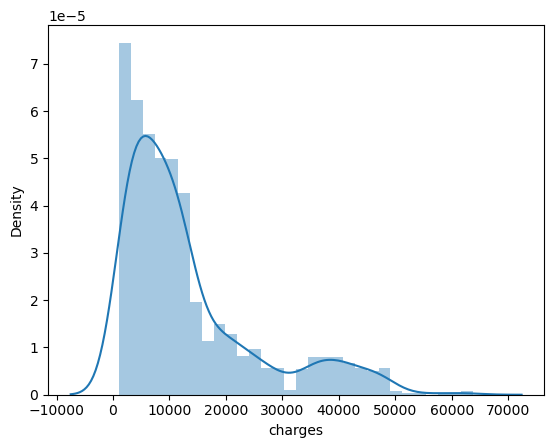

In [30]:
#distribution of target 
sns.distplot(df.charges);

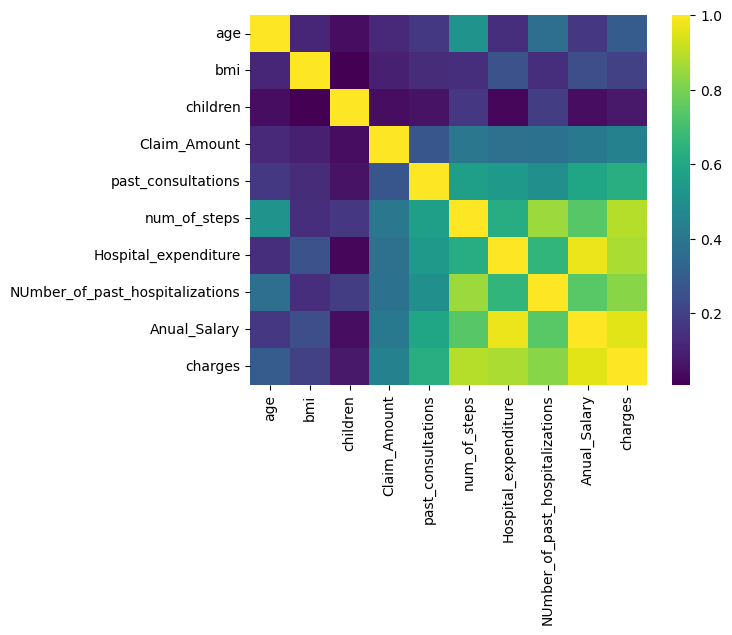

In [32]:
sns.heatmap(df.select_dtypes(include='number').corr(), cmap = 'viridis');

In [ ]:
df.duplicated().sum()

In [ ]:
#for float and int values we prefer using mean
#for object type values we prefer using modefor col_name in col:

cols = df.columns

for i in cols:    #Using for loop
    if df[i].dtypes == object:
        df[i] = df[i].fillna(data[i].mode()[0])
    else:
        data[i] = data[i].fillna(data[i].mean())

In [33]:
df.isna().sum()  #after mean/median imputation

age                                 9
sex                                 0
bmi                                 3
children                            5
smoker                              0
Claim_Amount                       14
past_consultations                  6
num_of_steps                        3
Hospital_expenditure                4
NUmber_of_past_hospitalizations     2
Anual_Salary                        6
region                              0
charges                             0
dtype: int64

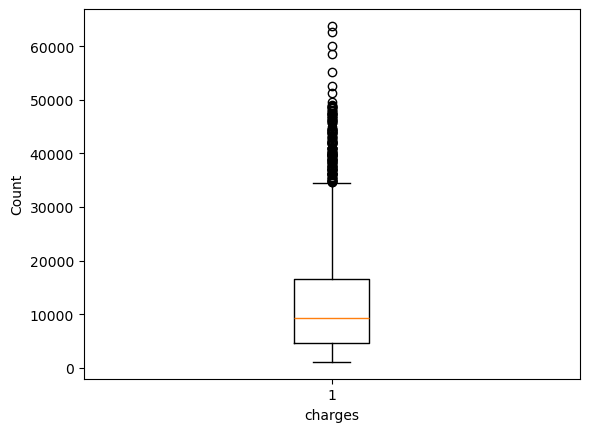

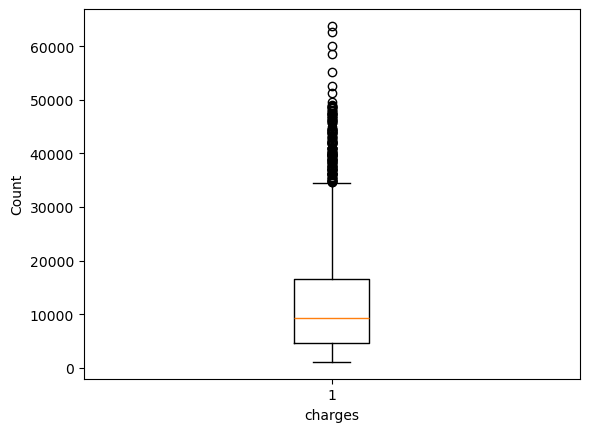

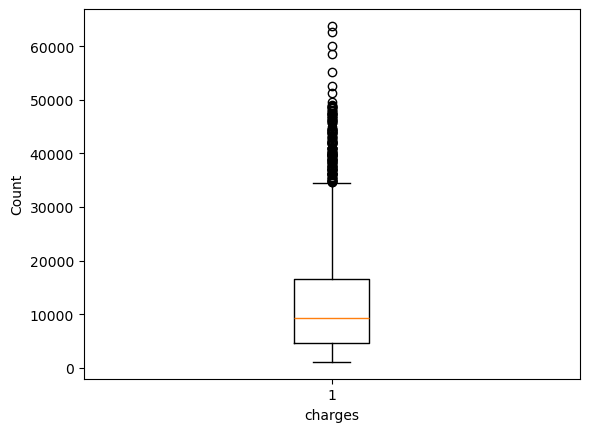

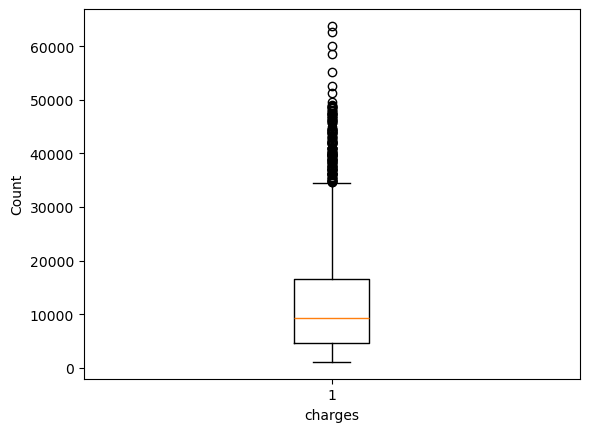

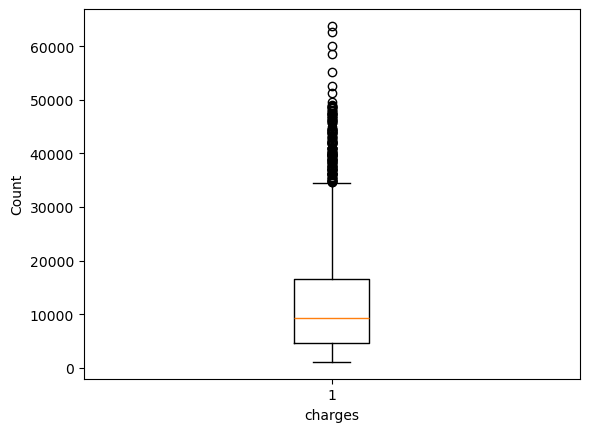

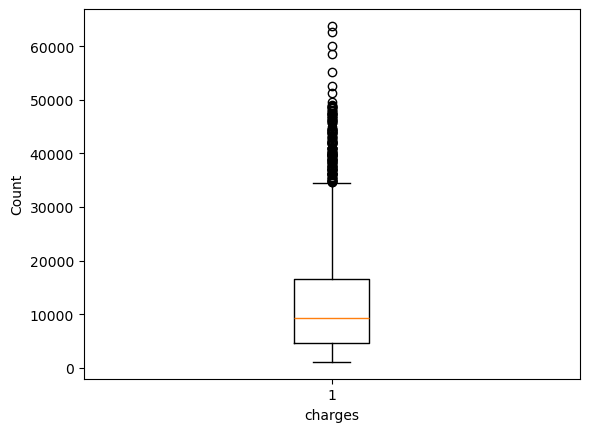

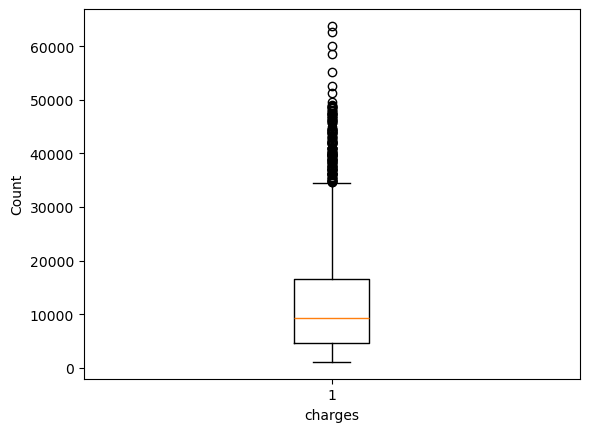

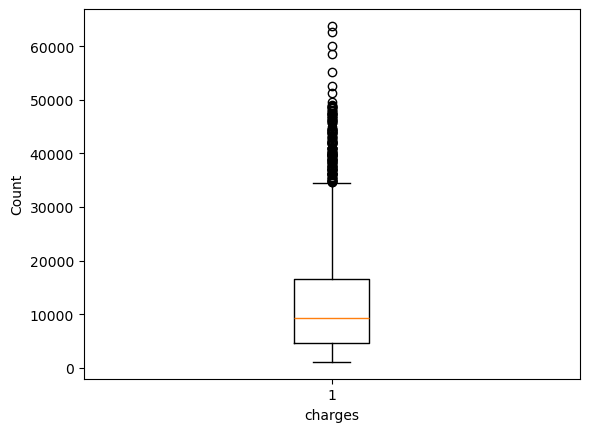

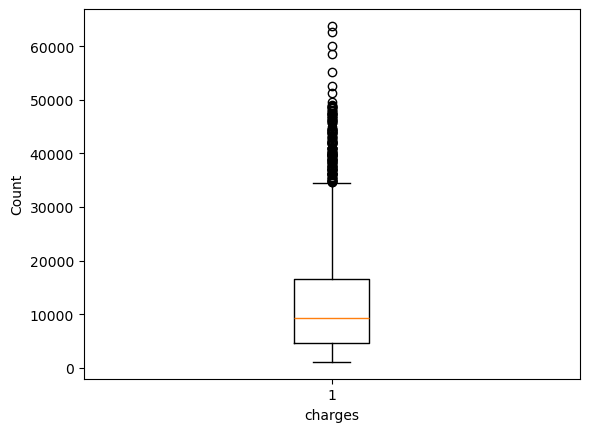

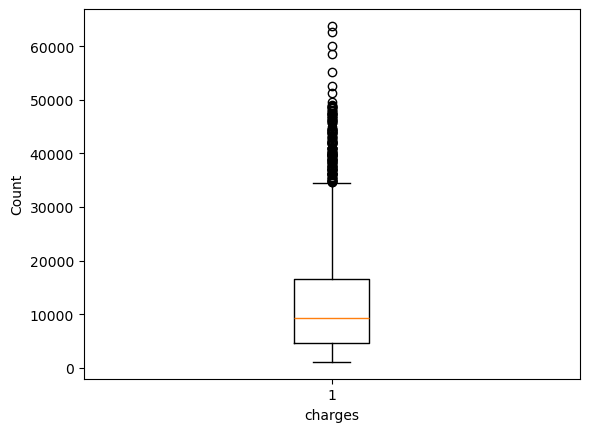

In [38]:
for col in df.columns:
    if df[col].dtypes == object:
        pass  
    else:
      plt.boxplot(df[i])
      plt.xlabel(i)
      plt.ylabel('Count')
      plt.show()


In [43]:
# for BMI

Q1 = df.bmi.quantile(0.25)
Q3 = df.bmi.quantile(0.75)
IQR = Q3 - Q1
df= df[(df.bmi >= Q1 - 1.5*IQR) & (df.bmi <= Q3 + 1.5* IQR)]

In [ ]:
#For past_consultations

Q1 = df.past_consultations.quantile(0.25)
Q3 = df.past_consultations.quantile(0.75)
IQR = Q3-Q1
df = df[(df.past_consultations >= Q1 - 1.5*IQR) & (df.past_consultations <= Q3 + 1.5*IQR)]

In [44]:
#For hospital_expenditure

Q1=df.Hospital_expenditure.quantile(0.25)
Q3=df.Hospital_expenditure.quantile(0.75)
IQR=Q3-Q1
df=df[(df.Hospital_expenditure>=Q1 - 1.5*IQR) & (df.Hospital_expenditure<=Q3 + 1.5*IQR)]

In [45]:
#For Anual_Salary

Q1=df.Anual_Salary.quantile(0.25)
Q3=df.Anual_Salary.quantile(0.75)
IQR=Q3-Q1
df=df[(df.Anual_Salary>=Q1 - 1.5*IQR) & (df.Anual_Salary<=Q3 + 1.5*IQR)]

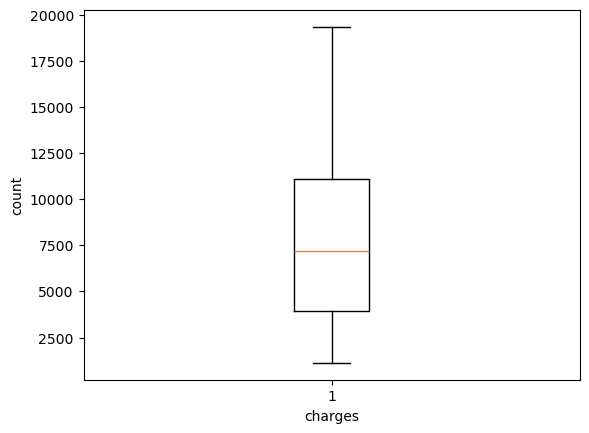

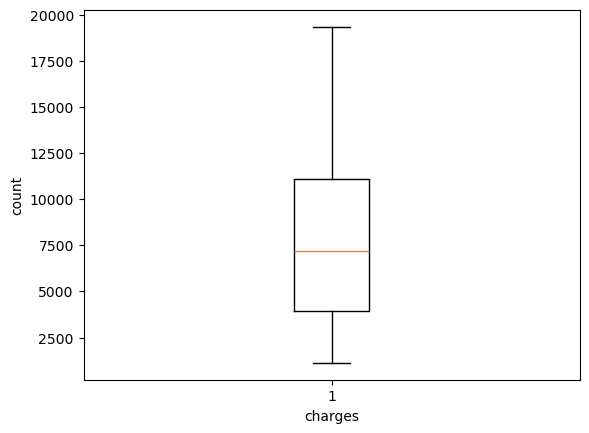

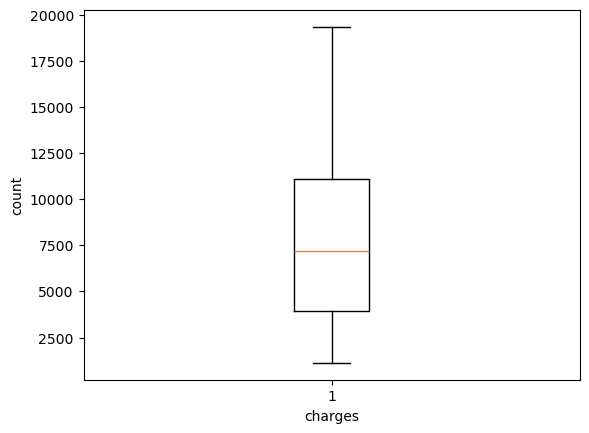

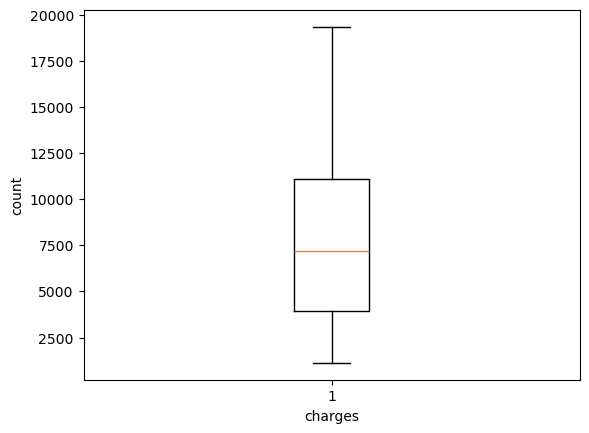

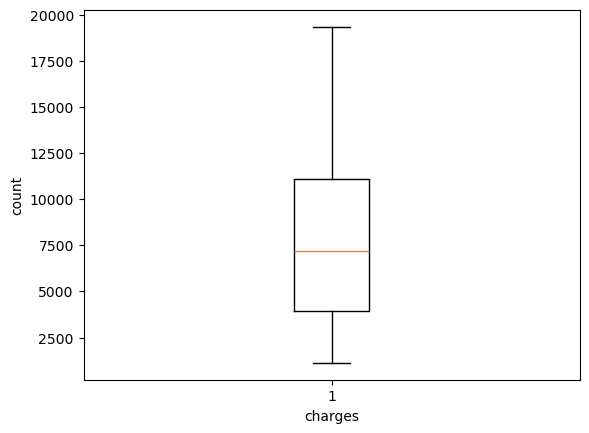

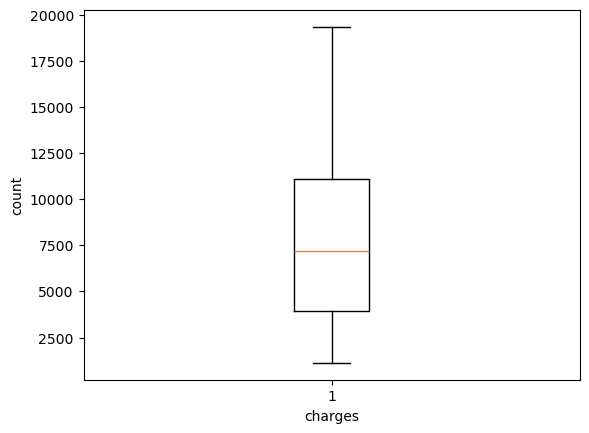

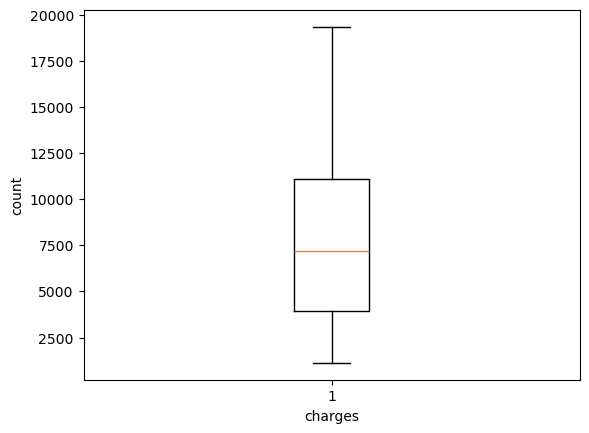

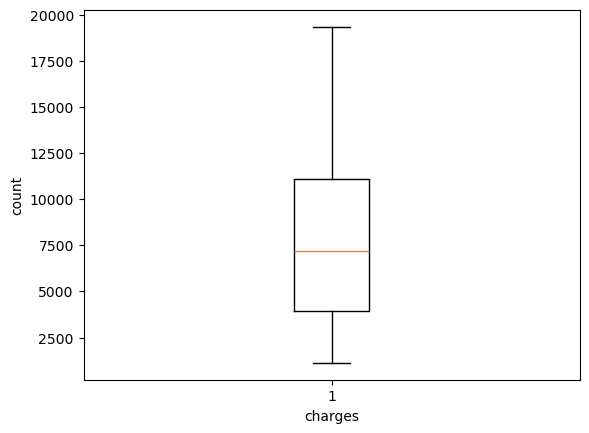

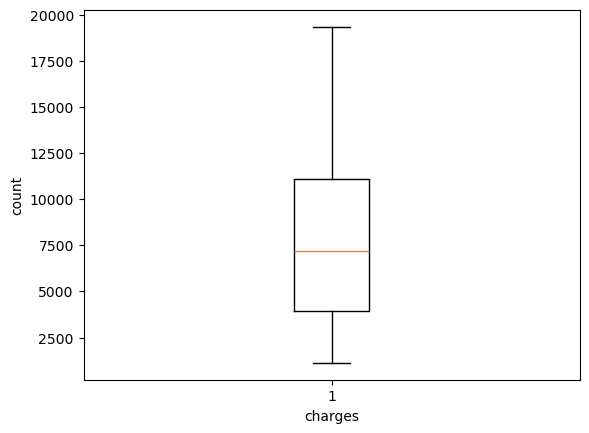

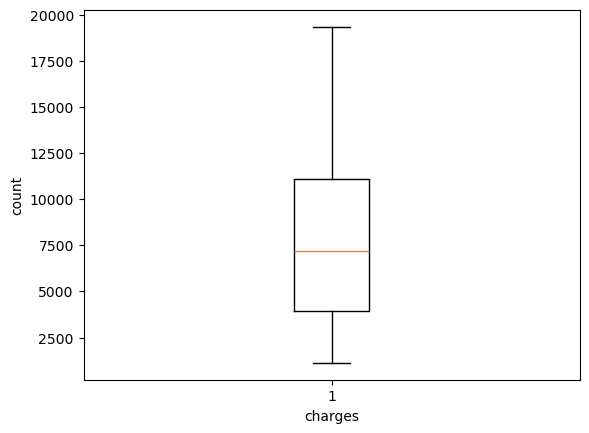

In [47]:

for col in df.columns:
    if df[col].dtypes == object:
        pass 
    else:
        plt.boxplot(df[i])
        plt.xlabel(i)
        plt.ylabel('count')
        plt.show()

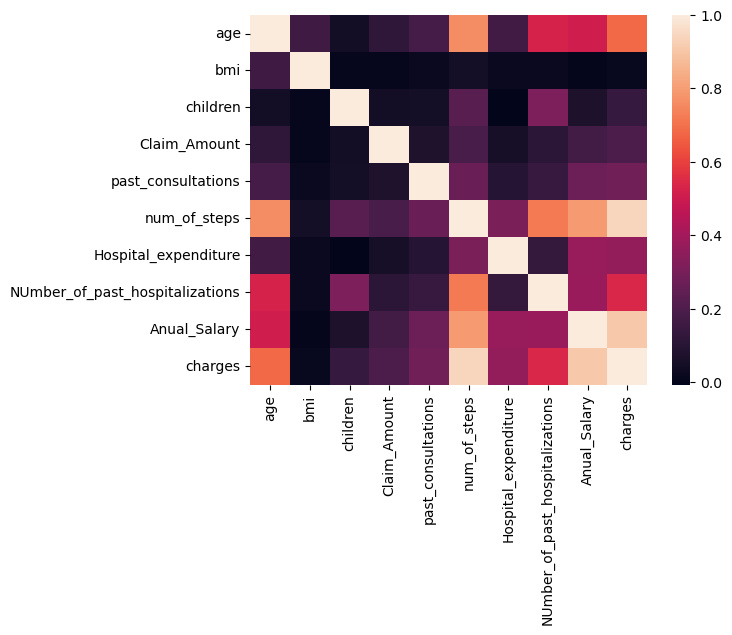

In [49]:
C = df.select_dtypes(include='number').corr()
sns.heatmap(data = C);

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [52]:
col_list=[]
for col in df.columns:
    if((df[col].dtypes!=object)):
        col_list.append(col)
col_list

['age',
 'bmi',
 'children',
 'Claim_Amount',
 'past_consultations',
 'num_of_steps',
 'Hospital_expenditure',
 'NUmber_of_past_hospitalizations',
 'Anual_Salary',
 'charges']

In [54]:
X = df[col_list]

In [55]:
X.columns

Index(['age', 'bmi', 'children', 'Claim_Amount', 'past_consultations',
       'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary', 'charges'],
      dtype='object')

In [57]:
# Replace inf/-inf with NaN
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill missing values with the mean of each column
X_filled = X.fillna(X.mean())

# Calculate VIF
vif_df = pd.DataFrame()
vif_df['feature'] = X_filled.columns
vif_df['VIF'] = [variance_inflation_factor(X_filled.values, i) for i in range(X_filled.shape[1])]

print(vif_df)


                           feature        VIF
0                              age  20.907947
1                              bmi  27.676471
2                         children   2.052720
3                     Claim_Amount   5.706275
4               past_consultations   6.238156
5                     num_of_steps  61.598284
6             Hospital_expenditure   5.335470
7  NUmber_of_past_hospitalizations  13.041234
8                     Anual_Salary  24.352939
9                          charges  42.448833


In [59]:
#dropping columns with high VIF
df=df.drop(['num_of_steps','NUmber_of_past_hospitalizations','age','bmi'],axis=1)

In [61]:
import numpy as np
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Step 1: Keep only numeric columns
X_numeric = X.select_dtypes(include=[np.number])

# Step 2: Replace inf/-inf with NaN
X_numeric.replace([np.inf, -np.inf], np.nan, inplace=True)

# Step 3: Fill missing values with column means
X_filled = X_numeric.fillna(X_numeric.mean())

# Step 4: Confirm there are no NaNs or infs
assert np.isfinite(X_filled.values).all(), "There are still NaNs or Infs in the data."

# Step 5: Calculate VIF
vif_df = pd.DataFrame()
vif_df['feature'] = X_filled.columns
vif_df['VIF'] = [variance_inflation_factor(X_filled.values, i) for i in range(X_filled.shape[1])]

print(vif_df)


                feature       VIF
0              children  1.715563
1          Claim_Amount  4.170974
2    past_consultations  4.665347
3  Hospital_expenditure  4.387069
4          Anual_Salary  4.400581


In [62]:
x=df.loc[:,['children','Claim_Amount','past_consultations','Hospital_expenditure','Anual_Salary']]
y=df.iloc[:,-1]

In [63]:
print(x.shape)
print(y.shape)

(1020, 5)
(1020,)


In [64]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)

In [65]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(816, 5)
(204, 5)
(816,)
(204,)


In [68]:
from sklearn.linear_model import LinearRegression

In [72]:
x_train.isna().sum()
y_train.isna().sum()

0

In [73]:
# Combine X and y to drop rows where either has NaNs
train_data = pd.concat([x_train, y_train], axis=1).dropna()

# Separate again
x_train_clean = train_data.drop(columns=y_train.name)
y_train_clean = train_data[y_train.name]

# Fit model
linear_reg = LinearRegression()
linear_reg.fit(x_train_clean, y_train_clean)

LinearRegression()

In [74]:
y_pred=linear_reg.predict(x_test)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [75]:
from sklearn.impute import SimpleImputer

# Fit the imputer on x_train
imputer = SimpleImputer(strategy='mean')
x_train_imputed = imputer.fit_transform(x_train)

# Transform x_test using the same fitted imputer
x_test_imputed = imputer.transform(x_test)

# Train and predict
linear_reg = LinearRegression()
linear_reg.fit(x_train_imputed, y_train)
y_pred = linear_reg.predict(x_test_imputed)

In [77]:
#To get predictions
y_pred=linear_reg.predict(x_test_imputed)


In [78]:
from sklearn.metrics import *


In [80]:
linear_reg_mse = mean_squared_error(y_test, y_pred)
linear_reg_rmse = mean_squared_error(y_test, y_pred, squared=False)
linear_reg_r2_score = r2_score(y_test, y_pred)

# Evaluation Metrics
print(f"The Mean Squared Error using Linear Regression : ", linear_reg_mse)
print(f"The Root Mean Squared Error using Linear Regression : ", linear_reg_rmse)
print(f"The r2_score using Linear Regression : ", linear_reg_r2_score)

The Mean Squared Error using Linear Regression :  2779710.9854193674
The Root Mean Squared Error using Linear Regression :  1667.2465280873635
The r2_score using Linear Regression :  0.8515953810264563


In [81]:
from sklearn.tree import DecisionTreeRegressor

In [84]:
decision_tree= LinearRegression()
decision_tree.fit(x_train_imputed, y_train)

#To get predictions
y_pred1 = decision_tree.predict(x_test_imputed)

In [85]:
# Evaluation Metrics
decision_tree_mse = mean_squared_error(y_test, y_pred)
decision_tree_rmse = mean_squared_error(y_test, y_pred1, squared=False)
decision_tree_r2_score = r2_score(y_test, y_pred1)

print(f"The Mean Squared Error using Decision Tree Regressor : ",decision_tree_mse)
print(f"The Root Mean Squared Error using Decision Tree Regressor : ", decision_tree_rmse)
print(f"The r2_score using Decision Tree Regressor : ", decision_tree_r2_score)

The Mean Squared Error using Decision Tree Regressor :  2779710.9854193674
The Root Mean Squared Error using Decision Tree Regressor :  1667.2465280873635
The r2_score using Decision Tree Regressor :  0.8515953810264563


In [86]:
from sklearn.ensemble import RandomForestRegressor

random_forest= RandomForestRegressor()
random_forest.fit(x_train_imputed, y_train)

#To get predictions
y_pred2 = decision_tree.predict(x_test_imputed)

In [87]:
# Evaluation Metrics
random_forest_mse = mean_squared_error(y_test, y_pred2)
random_forest_rmse = mean_squared_error(y_test, y_pred2, squared=False)
random_forest_r2_score = r2_score(y_test, y_pred2)

print(f"The Mean Squared Error using Random Forest Regressor : ", random_forest_mse)
print(f"The Root Mean Squared Error using Random Forest Regressor : ", random_forest_rmse)
print(f"The r2_score Error using Random Forest Regressor : ", random_forest_r2_score)

The Mean Squared Error using Random Forest Regressor :  2779710.9854193674
The Root Mean Squared Error using Random Forest Regressor :  1667.2465280873635
The r2_score Error using Random Forest Regressor :  0.8515953810264563


In [88]:
gradient_boosting_reg = GradientBoostingRegressor()

gradient_boosting_reg.fit(x_train_imputed, y_train)

#To get predictions
y_pred3 = gradient_boosting_reg.predict(x_test_imputed)

In [89]:
# Evaluation Metrics
gradient_boosting_mse = mean_squared_error(y_test, y_pred3)
gradient_boosting_rmse = mean_squared_error(y_test, y_pred3, squared=False)
gradient_boosting_r2_score = r2_score(y_test, y_pred3)

print(f"The Mean Squared Error using Gradient Boosting Regressor : ", gradient_boosting_mse)
print(f"The Root Mean Squared Error using Gradient Boosting Regressor : ", gradient_boosting_rmse)
print(f"The r2_sccore using Gradient Boosting Regressor : ",gradient_boosting_r2_score)

The Mean Squared Error using Gradient Boosting Regressor :  2773314.750415394
The Root Mean Squared Error using Gradient Boosting Regressor :  1665.3272202229189
The r2_sccore using Gradient Boosting Regressor :  0.8519368664627512


In [90]:
knn = KNeighborsRegressor(n_neighbors=10)

knn.fit(x_train_imputed, y_train)

#To get predictions
y_pred4 = knn.predict(x_test_imputed)

In [91]:
# Evaluation Metrics
knn_mse = mean_squared_error(y_test, y_pred4)
knn_rmse = mean_squared_error(y_test, y_pred4, squared=False)
knn_r2_score = r2_score(y_test, y_pred4)

print(f"The mean squared error using KNN is ",knn_mse)
print(f"The root mean squared error using KNN is ",knn_rmse)
print(f"The r2_score using KNN is ",knn_r2_score)

The mean squared error using KNN is  3102518.362735817
The root mean squared error using KNN is  1761.396707938282
The r2_score using KNN is  0.8343611771528225


In [95]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor()

In [96]:
xgb_model.fit(x_train_imputed, y_train)
y_pred = xgb_model.predict(x_test_imputed)

In [99]:
xgb_model_reg_mse = mean_squared_error(y_test, y_pred)
xgb_model_reg_rmse = mean_squared_error(y_test, y_pred, squared=False)
xgb_model_reg_r2_score = r2_score(y_test, y_pred)

print(f"The mean square error using XGBoost is ",xgb_model_reg_mse)
print(f"The root mean_squared error using XGBoost is ",xgb_model_reg_rmse)
print(f"The r2 score using XGBoost is ", xgb_model_reg_r2_score)

The mean square error using XGBoost is  2803605.471999011
The root mean_squared error using XGBoost is  1674.3970472976268
The r2 score using XGBoost is  0.8503196900661295


In [101]:
models = pd.DataFrame({
    'Model' : ['Linear Regression', 'Decision Tree', 'Random Forest',
               'Gradient Boosting', 'KNN', 'XGBoost'],
    'RMSE' : [linear_reg_rmse, decision_tree_rmse, random_forest_rmse,
            gradient_boosting_rmse, knn_rmse, xgb_model_reg_rmse],
    'r2_score' : [linear_reg_r2_score, decision_tree_r2_score, random_forest_r2_score, 
    gradient_boosting_r2_score, knn_r2_score, xgb_model_reg_r2_score]
})

models.sort_values(by='RMSE', ascending=True)

,Model,RMSE,r2_score
3,Gradient Boosting,1665.327220,0.851937
0,Linear Regression,1667.246528,0.851595
1,Decision Tree,1667.246528,0.851595
2,Random Forest,1667.246528,0.851595
5,XGBoost,1674.397047,0.850320
4,KNN,1761.396708,0.834361
